# K-Means 클러스터링
- 아래 목적함수 최소화
    - 클러스터 중심위치와 각 데이터가 소속될 클러스터 반복 계산
        - Alernating 방식 사용
    - K: 클러스터 갯수
    - $C_k$: k번째 클러스터에 속하는 데이터 집합
    - d: 두 데이터의 비유사도(dissimilarirty) or 거리(distance) 
        - $d(x_i, \mu_k) = || x_i - \mu_k||$

$$
J = \sum_{k=1}^K \sum_{i in C_k} d(x_i, \mu_k)
$$

- 알고리즘
    - K개의 센터 랜덤 선택
    - 센터와 각 데이터 거리 계산 -> 최소인 cluster에 편입
    - 각 클러스터 내부에서 거리 합산 최소화하는 센터 다시 선정 
    - 센터 위치 바뀌었으니 다시 클러스터 편입 작업
- `KMeans`
    - `init`
        - random: 초기 중심 임의
        - k-means++: 초기 중심 임의X
    - `n_init`: 초기 중심값 시도 횟수
    - `max_iter`: 중심찾기 최대 반복 횟수

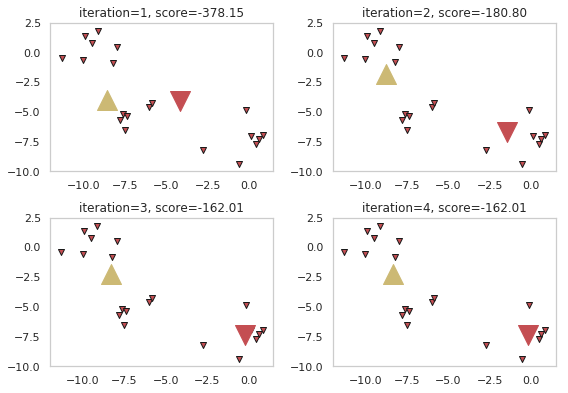

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=9)

def plot_KMeans(n):
    mod = KMeans(n_clusters=2, init='random', n_init=1, max_iter=n,\
                random_state=99).fit(X)
    c0, c1 = mod.cluster_centers_
    plt.scatter(X[mod.labels_ == 0, 0], X[mod.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[mod.labels_ == 1, 0], X[mod.labels_ == 1, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c='r', s=400)
    plt.scatter(c1[0], c1[1], marker='^', c='y', s=400)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, mod.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321);plot_KMeans(1);
plt.subplot(322);plot_KMeans(2);
plt.subplot(323);plot_KMeans(3);
plt.subplot(324);plot_KMeans(4);

plt.tight_layout()
plt.show()

# K-Means++
- 초기 중심값 설정 알고리즘: 서로 거리가 먼 센터들로 시작하자

    1. 중심값 저장할 집합 M 생성
    2. first $\mu_0$ 랜덤 선택 -> M에 저장
    3. 모든 $x_i \notin M$에 대해 d(M, $x_i$) 계산
        - d(M, $x_i$)에 비례한 확률로 다음 중심 $\mu$ 선택(주사위 던지기)
        - 또 다음 중심을 선택하기 위해, 이제는 **집합 vs 데이터** 거리 계산 -> 주사위 던지기
            - **집합 vs 데이터 거리 $d(M, x_i)$**: 집합 내 데이터 vs 외부 데이터 모든 거리 계산 -> min값을 선택
        
    6. K개 중심 선택할 때까지 반복
    7. K-menas 알고리즘 실행

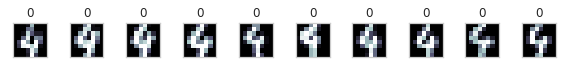

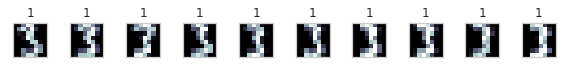

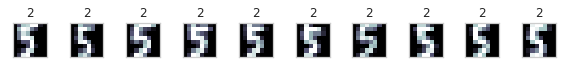

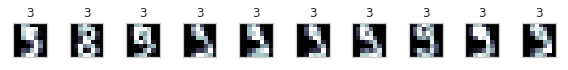

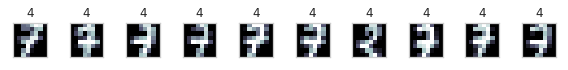

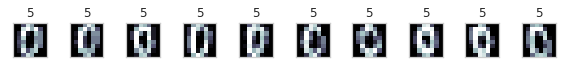

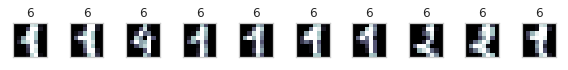

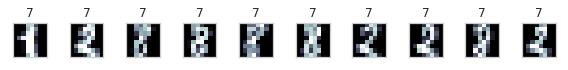

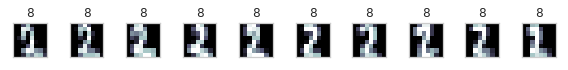

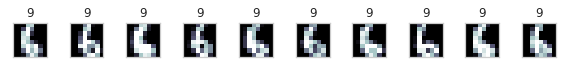

In [10]:
from sklearn.datasets import load_digits

dgits = load_digits()

mod = KMeans(init="k-means++", n_clusters=10, random_state=0)
mod.fit(dgits.data)
y_pred = mod.labels_

def show_dgits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i+1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_dgits(images, y_pred)

for i in range(10):
    show_cluster(dgits.images, y_pred, i)

confusion mat

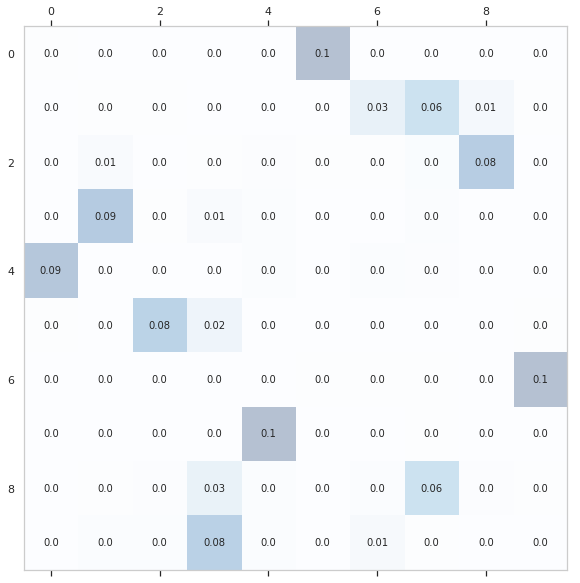

In [28]:
from sklearn.metrics import confusion_matrix
# def plot_cm(y_true, y_pred, title, cax):
#     cm = confusion_matrix(y_true, y_pred)
#     norm_cm = cm / cm.sum().astype(float)
#     sns.heatmap(norm_cm, anot=True, fmt='.2f',)

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(dgits.target, y_pred)
nor_cm = cm / cm.sum().astype(float)
ax.matshow(nor_cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=round(nor_cm[i, j],2), va='center', ha='center')
ax.grid(False)
plt.show()

In [31]:
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
print(adjusted_mutual_info_score(dgits.target, y_pred))
print(adjusted_rand_score(dgits.target, y_pred).)

0.7397973157276612
0.6686991223627669
